       Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290   
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325   
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322   
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862   
4  0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345  2.812442   

  Quality  
0    Good  
1    Good  
2    Good  
3    Good  
4    Good  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidit

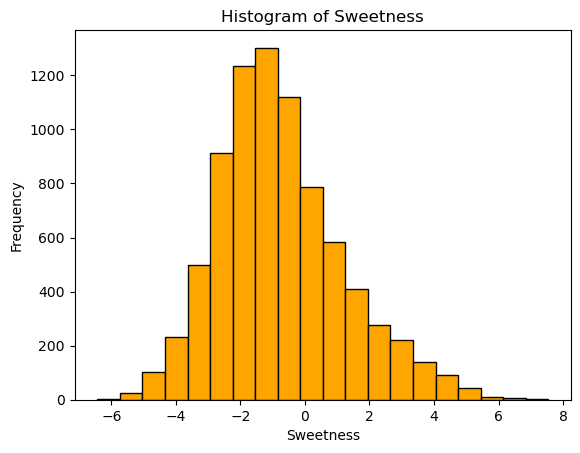

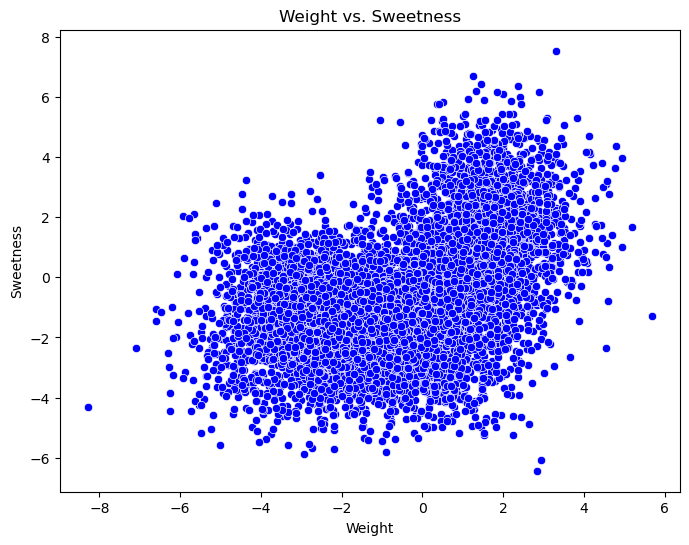

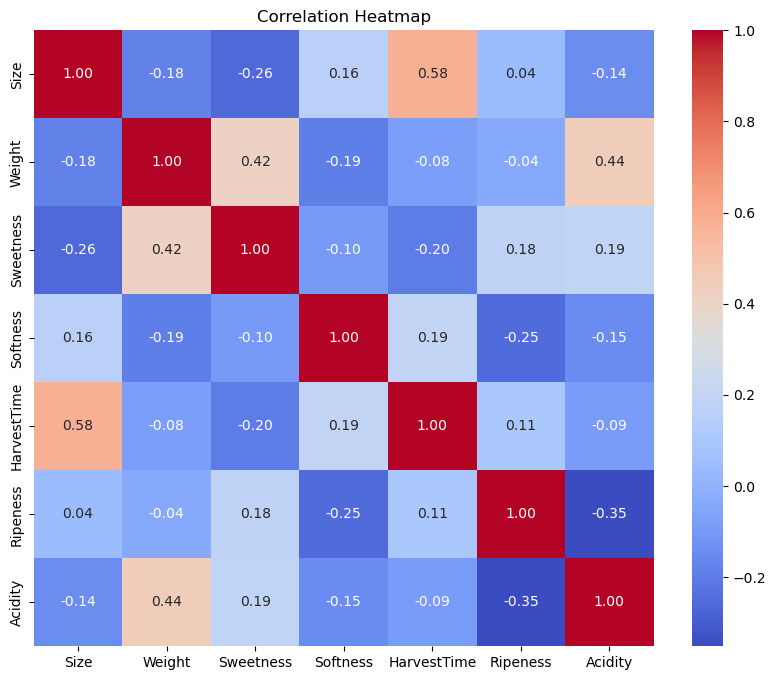

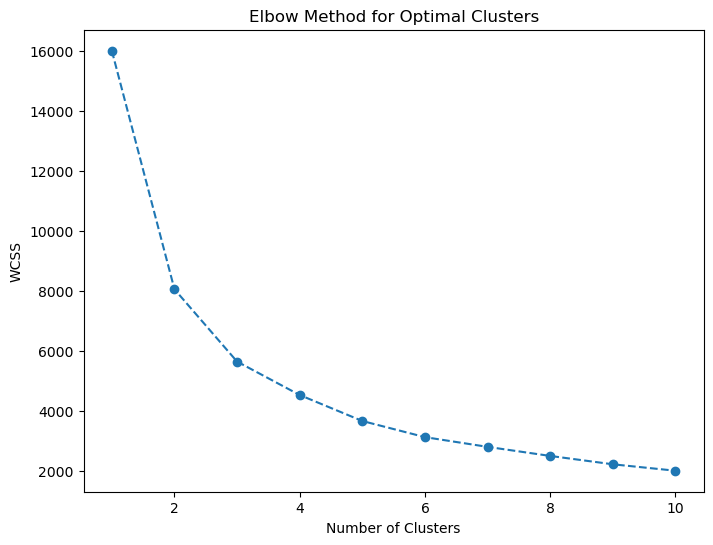

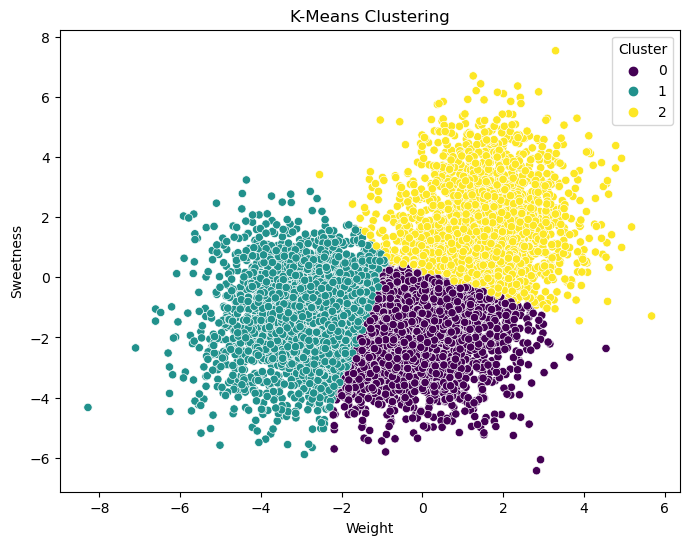

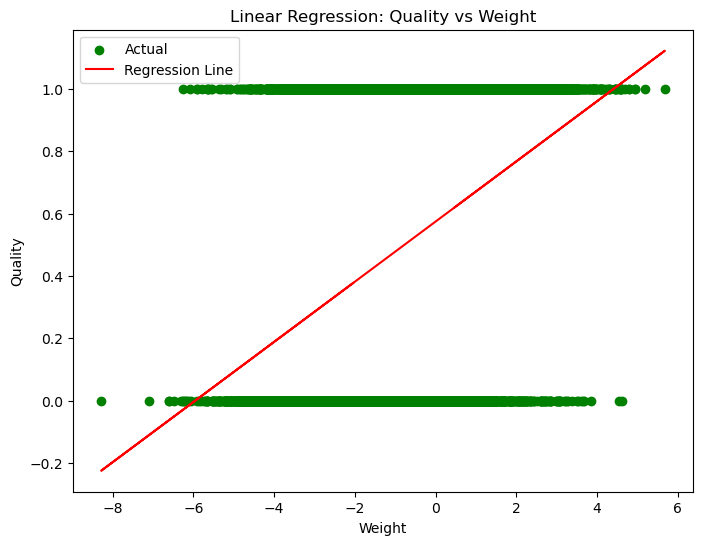

Coefficients: [[0.09643488]]
Intercept: [0.57413881]
Mean Squared Error: 0.212210320056091
R² Score: 0.15115680987845803


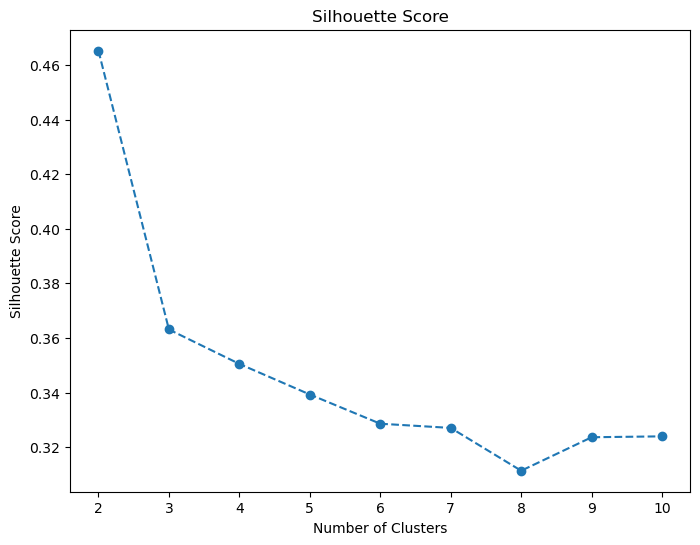

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the dataset (make sure the correct path is provided for your file)
df = pd.read_csv("banana_quality.csv")

# Display the first few rows of the dataset
print(df.head())

# Summary of the dataset
print(df.info())

# Histogram function
def create_histogram(data, column_name, bins=10):
    plt.hist(data[column_name], bins=bins, color='orange', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

# Example usage
create_histogram(df, 'Sweetness', bins=20)

# Scatter plot function
def create_scatter_plot(data, x_column, y_column):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_column, y=y_column, data=data, color='blue')
    plt.title(f'{x_column} vs. {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Example usage
create_scatter_plot(df, 'Weight', 'Sweetness')

# Heatmap function
def create_heatmap(data):
    numeric_data = data.select_dtypes(include='number')
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

# Example usage
create_heatmap(df)


# K-Means Clustering
def kmeans_clustering(data, features, n_clusters=3):
    # Handle missing values by imputation (mean strategy)
    imputer = SimpleImputer(strategy='mean')
    data[features] = imputer.fit_transform(data[features])
    
    X = data[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Elbow method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    # Plot the elbow method
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Fit K-Means
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    data['Cluster'] = kmeans.fit_predict(X_scaled)

    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=features[0], y=features[1], hue='Cluster', data=data, palette='viridis')
    plt.title('K-Means Clustering')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend(title='Cluster')
    plt.show()

# Example usage
# Replace 'Weight' and 'Sweetness' with the correct column names in your dataset if necessary
kmeans_clustering(df, ['Weight', 'Sweetness'])

# Linear Regression Fit
def linear_regression_fit(data, x_column, y_column):
    # Handle missing values for features
    imputer = SimpleImputer(strategy='mean')
    X = data[[x_column]].values
    y = data[y_column].values
    
    # Impute missing values for features
    X_imputed = imputer.fit_transform(X)

    # Encode categorical target variable 'y'
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)  # Convert categorical target to numeric

    # Impute missing values for the target variable (after encoding)
    y_imputed = imputer.fit_transform(y_encoded.reshape(-1, 1))  # Impute missing target values
    
    # Initialize the linear regression model
    model = LinearRegression()
    model.fit(X_imputed, y_imputed)

    # Predictions
    y_pred = model.predict(X_imputed)

    # Plotting the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X_imputed, y_imputed, color='green', label='Actual')
    plt.plot(X_imputed, y_pred, color='red', label='Regression Line')
    plt.title(f'Linear Regression: {y_column} vs {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.show()

    # Displaying model metrics
    print(f'Coefficients: {model.coef_}')
    print(f'Intercept: {model.intercept_}')
    print(f'Mean Squared Error: {mean_squared_error(y_imputed, y_pred)}')
    print(f'R² Score: {r2_score(y_imputed, y_pred)}')

# Example usage
# Replace 'Weight' and 'Quality' with the correct column names in your dataset if necessary
linear_regression_fit(df, 'Weight', 'Quality')

# Silhouette Score Plot
def plot_silhouette_score(data, features, max_clusters=10):
    # Handle missing values by imputation (mean strategy)
    imputer = SimpleImputer(strategy='mean')
    data[features] = imputer.fit_transform(data[features])
    
    X = data[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot silhouette scores
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

# Example usage
# Replace 'Sweetness' and 'Crunchiness' with the correct column names in your dataset if necessary
plot_silhouette_score(df, ['Sweetness', 'Weight'])


In [3]:
#Descriptive Statistics
df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Cluster
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725,0.885000
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467,0.770292
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977,0.000000
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450,0.000000
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735,1.000000
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063,1.000000
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633,2.000000


In [4]:
# Compute the correlation matrix
numeric_cols = df.select_dtypes(include='number') 
correlation_matrix = numeric_cols.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 Size    Weight  Sweetness  Softness  HarvestTime  Ripeness  \
Size         1.000000 -0.181933  -0.258027  0.164526     0.582014  0.042587   
Weight      -0.181933  1.000000   0.422683 -0.189908    -0.079465 -0.035276   
Sweetness   -0.258027  0.422683   1.000000 -0.095338    -0.201657  0.180095   
Softness     0.164526 -0.189908  -0.095338  1.000000     0.194734 -0.253804   
HarvestTime  0.582014 -0.079465  -0.201657  0.194734     1.000000  0.107127   
Ripeness     0.042587 -0.035276   0.180095 -0.253804     0.107127  1.000000   
Acidity     -0.140673  0.443879   0.187059 -0.146014    -0.090903 -0.351531   
Cluster     -0.195628  0.225106   0.695264 -0.178946    -0.198443  0.158499   

              Acidity   Cluster  
Size        -0.140673 -0.195628  
Weight       0.443879  0.225106  
Sweetness    0.187059  0.695264  
Softness    -0.146014 -0.178946  
HarvestTime -0.090903 -0.198443  
Ripeness    -0.351531  0.158499  
Acidity      1.000000  0.2042